# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
from numpy import random

import seaborn as sns
import matplotlib.pylab as plt

/Users/pedroconsuegramateo/opt/miniconda3/envs/m2_ih/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def rolling(n):
    
    df = pd.DataFrame([(random.randint(6) + 1) for _ in range(n)])
    df.columns = ['Roll Dice']
    return df

In [3]:
roll = rolling(6)
roll.sort_values(by='Roll Dice')

,Roll Dice
0,1
3,2
5,2
1,3
4,3
2,6


#### 2.- Plot the results sorted by value.

<AxesSubplot:ylabel='Count'>

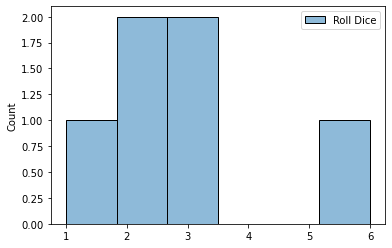

In [4]:
# your code here
sns.histplot(roll.sort_values(by='Roll Dice'), bins=6)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:xlabel='Roll Dice', ylabel='count'>

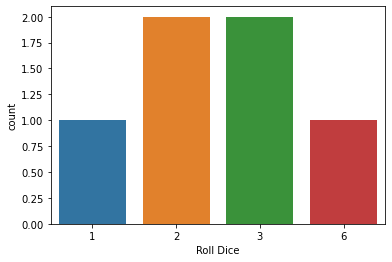

In [5]:
# your code here
sns.countplot(x='Roll Dice' , data=roll)

In [6]:
"""
Axis x points are better represented and more clarifying in the countplot
"""

'\nAxis x points are better represented and more clarifying in the countplot\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(serie):
    serie = list(serie)
    acumulate = 0
    for i in serie:
        acumulate += i
    mean = acumulate / len(serie)
    return mean

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

<AxesSubplot:xlabel='Roll Dice', ylabel='count'>

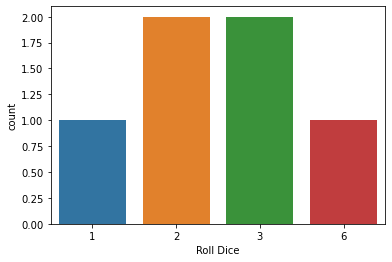

In [8]:
# your code here
sns.countplot(x='Roll Dice' , data=roll)

In [9]:
dice_mean = mean(roll['Roll Dice'])
dice_mean

2.8333333333333335

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def median(serie):
    serie = serie.sort_values()
    serie = list(serie)

    if (len(serie) % 2) == 0:
        median = serie[int((len(serie)/2))]
    else:
        median = (serie[int((len(serie)-1)/2)] + serie[int((len(serie)+1)/2)]) / 2
    return median
    

In [11]:
dice_median = median(roll['Roll Dice'])
dice_median

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [12]:
# your code here
def quartiles(serie):
    serie = serie.sort_values()
    serie = list(serie)
    
    if (len(serie) % 2) == 0:
        f = serie[int((len(serie)/2)/2)]
        s = serie[int((len(serie)/2))]        
        t = serie[int((len(serie)/2 + (len(serie)/2)/2))]
    else:
        f = (serie[int((len(serie)-1)/2/2)] + serie[int((len(serie)+1)/2/2)]) / 2
        s = (serie[int((len(serie)-1)/2)] + serie[int((len(serie)+1)/2)]) / 2
        t = (serie[int(((len(serie)-1)/2 + ((len(serie)-1)/2)/2))] + serie[int(((len(serie)+1)/2 + ((len(serie)+1)/2)/2))]) / 2
    return f, s, t

In [13]:
f, s, t = quartiles(roll['Roll Dice'])
t

3

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
# your code here
rolls = pd.read_csv('../data/roll_the_dice_hundred.csv')
rolls

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


<AxesSubplot:xlabel='value', ylabel='count'>

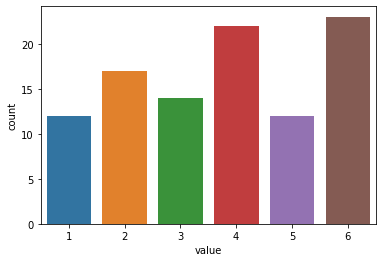

In [15]:
sns.countplot(x='value' , data=rolls)

In [16]:
"""
There are a tipical frequency distribution of the values. All values have similar frequency
"""

'\nThere are a tipical frequency distribution of the values. All values have similar frequency\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here
rolls_mean = mean(rolls['value'])
rolls_mean

3.74

In [18]:
rolls['value'].mean()

3.74

#### 3.- Now, calculate the frequency distribution.


<AxesSubplot:xlabel='value', ylabel='count'>

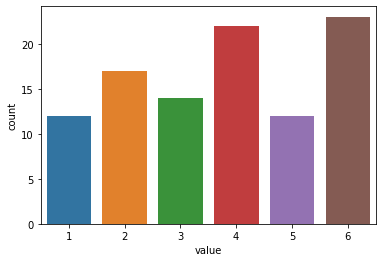

In [19]:
# your code here
sns.countplot(x='value' , data=rolls)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value', ylabel='Count'>

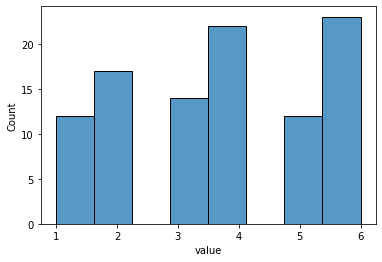

In [20]:
# your code here
sns.histplot(x='value' , data=rolls)

In [21]:
"""
The mean value is credible because all values have a similar frequency.
"""

'\nThe mean value is credible because all values have a similar frequency.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [22]:
# your code here
thousandrolls = pd.read_csv('../data/roll_the_dice_thousand.csv')
thousandrolls

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


<AxesSubplot:xlabel='value', ylabel='count'>

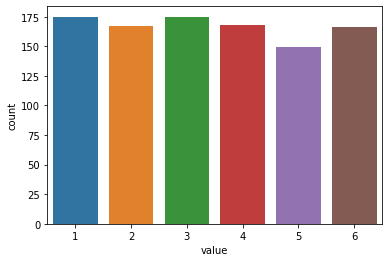

In [23]:
sns.countplot(x='value' , data=thousandrolls)

In [24]:
"""
Same frequency distribution because a not tricked dice is a tricked dice for any roll. The count is the unique change. 
"""

'\nSame frequency distribution because a not tricked dice is a tricked dice for any roll. The count is the unique change. \n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [25]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


<AxesSubplot:xlabel='observation', ylabel='count'>

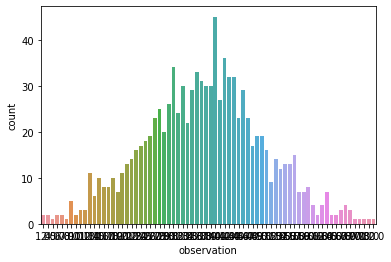

In [26]:
sns.countplot(x='observation' , data=ages)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [27]:
# your code here
ages['observation'].mean()

36.56

In [28]:
ages['observation'].std()

12.816499625976762

In [29]:
"""
Yes, because the frequency distribution is a perfect example of a normal distribution.
"""

'\nYes, because the frequency distribution is a perfect example of a normal distribution.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [30]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


<AxesSubplot:xlabel='observation', ylabel='count'>

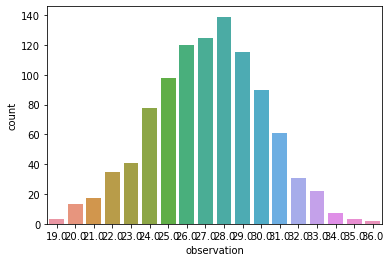

In [31]:
sns.countplot(x='observation' , data=ages2)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [32]:
"""
No. Still being normal distribution.
"""

'\nNo. Still being normal distribution.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [33]:
# your code here
ages2['observation'].mean()

27.155

In [34]:
ages2['observation'].std()

2.969813932689186

In [35]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [36]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [38]:
# your code here
mean3 = ages3['observation'].mean()
stdev3 = ages3['observation'].std()
print(f'Mean: {mean3}; St Dev: {stdev3}')

Mean: 41.989; St Dev: 16.144705959865934


In [39]:
"""
In this dataset mean and stdev is higher than ages2, which are higher in ages1.
"""

'\nIn this dataset mean and stdev is higher than ages2, which are higher in ages1.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [43]:
# your code here
f = ages3['observation'].quantile(q=0.25)
s = ages3['observation'].quantile(q=0.5)
t = ages3['observation'].quantile(q=0.75)

print(f'0.25q: {f}, 0.5q: {s}, 0.75q: {t}')

0.25q: 30.0, 0.5q: 40.0, 0.75q: 53.0


In [1]:
"""
The tails have been cut. There are less very young and very old ages. 
"""

'\nThe tails have been cut. There are less very young and very old ages. \n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [44]:
# your code here
ten = ages3['observation'].quantile(q=0.10)
ninety = ages3['observation'].quantile(q=0.90)

print(f'0.90: {ninety}, 0.1: {ten}')

0.90: 67.0, 0.1: 22.0


In [45]:
"""
I can conclude that last reasoning is true.
"""

'\nI can conclude that last reasoning is true.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""